# Ford GoBike System Data
## by Yi-Cheng Peng

## Preliminary Wrangling

> Ford GoBike serves bicycle sharing service. The data was collected from 2019-02-01 to 2019-02-28. For more information, please consult: <br /> 
https://www.lyft.com/bikes/bay-wheels/system-data<br />
https://en.wikipedia.org/wiki/Bay_Wheels

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
bike = pd.read_csv('201902-fordgobike-tripdata.csv')
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
bike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> The main missing data lies in member_birth_year and member_gender.

### What is the structure of your dataset?

> There are 183,412 bike records in the dataset with 16 features. Based on column name, we can categorize these features as follow: <br />
    a. **numeric**: duration_sec<br />
    b. **ordinal**: member_birth_year<br />
    b. **nominal**: start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, member_gender, bike_share_for_all_trip<br />
    c. **datetime**: start_time, end_time<br />
    d. **coordinate**: (start_station_latitude, start_station_longitude), (end_station_latitude, end_station_longitude)

### What is/are the main feature(s) of interest in your dataset?

> Which features have positive/negative correlations on duration? <br />Are there any surprising findings? <br />What features might help customers apply for subscriber?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect member_birth_year(age) and member_gender have stronger relationships.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [6]:
bike_copy = bike.copy()
bike_nona = bike_copy[bike_copy['member_birth_year'].notna()]

In [7]:
bike_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   175147 non-null  float64
 6   start_station_longitude  175147 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     175147 non-null  float64
 10  end_station_longitude    175147 non-null  float64
 11  bike_id                  175147 non-null  int64  
 12  user_type                175147 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
# Transform start_time and end_time into datetime type
bike_copy['start_time'] = pd.to_datetime(bike_copy['start_time'])
bike_copy['end_time'] = pd.to_datetime(bike_copy['end_time'])
bike_copy.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [9]:
# datetime start_time can extract week_day
bike_copy['week_day'] = bike_copy['start_time'].dt.day_name()

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [10]:
# 1. verify end_time - start_time == duration_sec                        
bike_copy['duration'] = (bike_copy['end_time'] - bike_copy['start_time']).dt.total_seconds()
bike_copy['duration'] = bike_copy['duration'].apply(np.floor)

In [11]:
sum(bike_copy['duration']!=bike_copy['duration_sec'])

0

> using end_time - start_time then transform to seconds, we verify duration is correct.

In [12]:
bike_copy['duration_sec'].mean() 

726.078435434977

In [13]:
bike_copy['duration_sec'].max() 

85444

In [14]:
bike_copy[ bike_copy['duration_sec'] == bike_copy['duration_sec'].max() ][ ['duration_sec', 'start_time', 'end_time']]

,duration_sec,start_time,end_time
101361,85444,2019-02-13 17:59:55.124,2019-02-14 17:43:59.954


> Average duration is about 12 minutes. Longest duration is 23 hour 29 minutes.

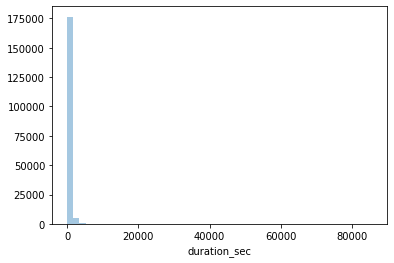

In [15]:
sb.distplot(bike_copy['duration_sec'], kde=False);

>  The distribution of duration is highly skewed to right. We need transformation.

In [16]:
np.log10(bike_copy['duration_sec']).describe()

count    183412.000000
mean          2.712606
std           0.309396
min           1.785330
25%           2.511883
50%           2.710963
75%           2.900913
max           4.931682
Name: duration_sec, dtype: float64

(30, 8000)

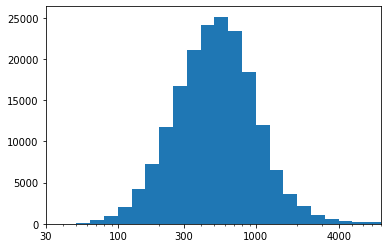

In [17]:
bins = 10 ** np.arange(1, 5+0.1, 0.1)
ticks = [30, 100, 300, 1000, 4000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=bike_copy, x='duration', bins=bins);
plt.xscale('log')
plt.xticks(ticks, labels);
plt.xlim(30, 8000)

> For duration_sec, after log transform, it shows normal distribution.

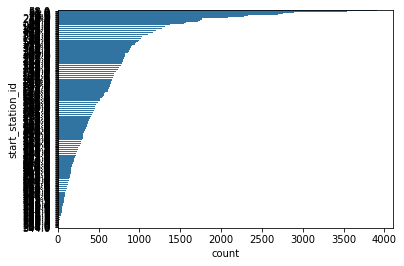

In [18]:
# 2. start_station_id
order = bike_copy['start_station_id'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data=bike_copy, y='start_station_id', color=base_color, order=order);

> There are too many start_stations. The bar chart does not show much.

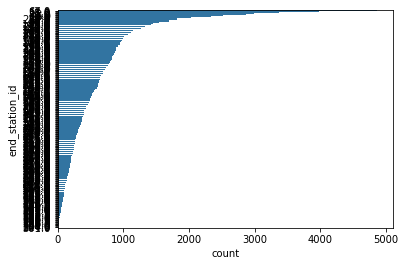

In [19]:
# 3. end_station_id
order = bike_copy['end_station_id'].value_counts().index
sb.countplot(data=bike_copy, y='end_station_id', color=base_color, order=order);

> There are too many end_stations. The bar chart does not show much.

In [20]:
# 4. start_station_id == end_station_id       
sum(bike_copy['start_station_id'] != bike_copy['end_station_id'])

179590

In [21]:
sum(bike_copy['start_station_id'] == bike_copy['end_station_id'])

3822

In [22]:
bike_copy['return_original'] = (bike_copy['start_station_id'] == bike_copy['end_station_id'])

> 3822 records start and end from the same station. Rest of the records(171494) indicate users borrow from A and return at B. <br />
For further analysis, we create one column 'return_original' to represent this feature.

In [23]:
# 5. xxx_station_latitude, xxx_station_longitude => use euclidean distance
bike_copy['distance'] = ((bike_copy['end_station_latitude'] - bike_copy['start_station_latitude'])**2 + (bike_copy['end_station_longitude'] - bike_copy['start_station_longitude'])**2 )**(0.5)
bike_copy['distance'].describe()

count    183412.000000
mean          0.016946
std           0.010926
min           0.000000
25%           0.009171
50%           0.014221
75%           0.022265
max           0.699399
Name: distance, dtype: float64

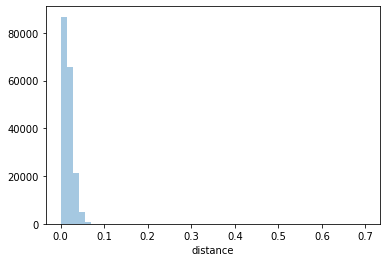

In [24]:
# exclude distance == 0, draw distribution
distance = bike_copy[ bike_copy['distance']!=0 ].distance
sb.distplot(distance, kde=False);

> Distance distribution shows right skewed. It needs some transformation.

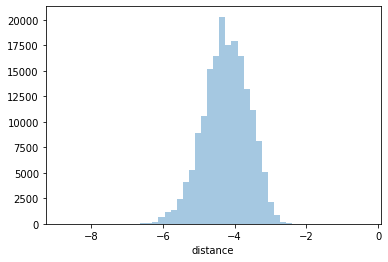

In [25]:
sb.distplot(np.log(distance), kde=False);

>  After log transformation, distance shows normal distribution.

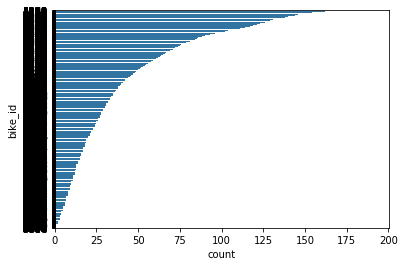

In [26]:
# 6. bike_id
order = bike_copy['bike_id'].value_counts().index
sb.countplot(data=bike_copy, y='bike_id', color=base_color, order=order);

> There are too many bike_ids. The bar chart does not show much.

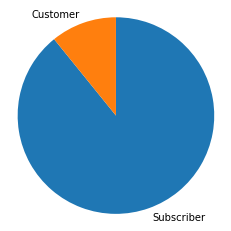

In [27]:
# 7. user_type
sorted_counts = bike_copy['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

plt.axis('square');

> Nearly 90% of the users are Subscriber, others are Customer. “Subscriber” = Member or “Customer” = Casual

In [28]:
bike_copy['user_type'].value_counts() / bike_copy.shape[0]

Subscriber    0.891676
Customer      0.108324
Name: user_type, dtype: float64

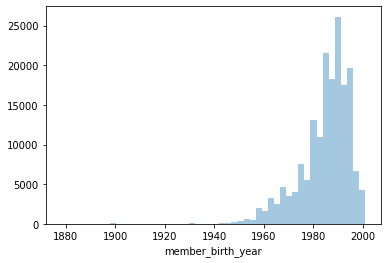

In [29]:
# 8. member_birth_year
sb.distplot(bike_nona['member_birth_year'], kde=False);

> member_birth_year is left skewed with min value 1878. 1878 might be a type error. <br />From this bar chart, we would consider member_birth_year before 1940s as outliers.

In [30]:
bike_nona['member_birth_year'].value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1930.0        1
1910.0        1
1927.0        1
1928.0        1
1878.0        1
Name: member_birth_year, Length: 75, dtype: int64

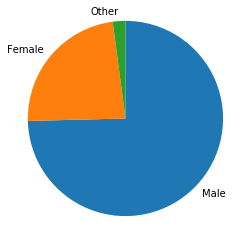

In [31]:
# 9. member_gender
sorted_counts = bike_nona['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

plt.axis('square');

> More than 70% of the users are male. More than 20% users are female.

In [32]:
bike_nona['member_gender'].value_counts() / bike_nona.shape[0]

Male      0.745951
Female    0.233198
Other     0.020851
Name: member_gender, dtype: float64

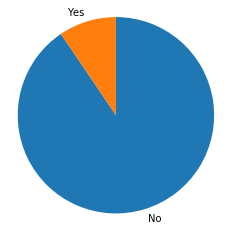

In [33]:
# 10. bike_share_for_all_trip
sorted_counts = bike_copy['bike_share_for_all_trip'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

plt.axis('square');

> 90% bike travels were unshared.

In [34]:
bike_copy['bike_share_for_all_trip'].value_counts() / bike_copy.shape[0]

No     0.905355
Yes    0.094645
Name: bike_share_for_all_trip, dtype: float64

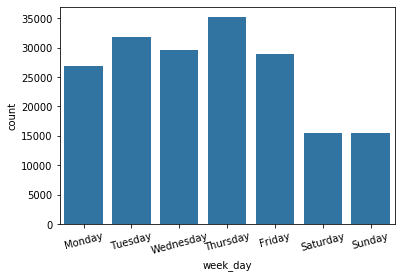

In [35]:
# 11. week_day bar chart
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=bike_copy, x='week_day', color=base_color, order=order);
plt.xticks(rotation=15);

>  Bike usage is higher on week_days compared to weekends. Surprisingly!

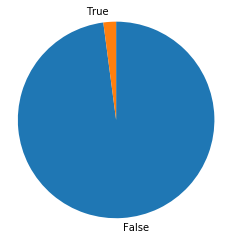

In [36]:
# 12. return_original
sorted_counts = bike_copy['return_original'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

plt.axis('square');

> 98% of bike records travel from station A to station B. 2% return to their original station.

In [37]:
bike_copy['return_original'].value_counts() / bike_copy.shape[0]

False    0.979162
True     0.020838
Name: return_original, dtype: float64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> duration_sec and distance are the main interests. But they are all right skewed. So we perform log transformation on these two.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> From the previous exploration, we did not see anything related to structure issues(tidyness). Hence, we were not concern about this.<br />
> Bike usage is higher on week_days compared to weekends. Surprisingly!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

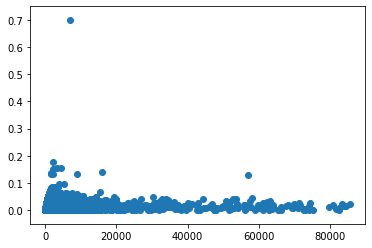

In [38]:
# 1. duration v.s. distance
plt.scatter(data=bike_copy, x='duration_sec', y='distance');

> I believe the outlier distance around 0.7 influenced this scatter plot. We will find this outlier first.

In [39]:
# Find the max distance record
bike_copy[bike_copy['distance'] > 0.6]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,week_day,duration,return_original,distance
112038,6945,2019-02-12 14:28:44.402,2019-02-12 16:24:30.158,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,300.0,Palm St at Willow St,37.317298,-121.884995,4780,Subscriber,1985.0,Female,No,Tuesday,6945.0,False,0.699399


> The farthest distance record was from a female Subscriber.

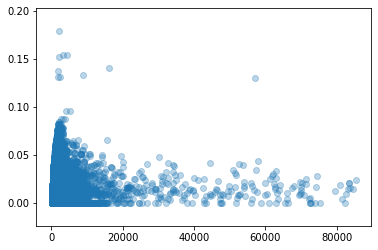

In [40]:
exclude = bike_copy[ bike_copy['distance'] < 0.699399 ]
plt.scatter(data = exclude, x = 'duration_sec', y = 'distance', alpha=0.3);

> After excluding that outlier, Duration v.s. Distance have a negative correlationship. The longer bikers use does not mean longer distance.

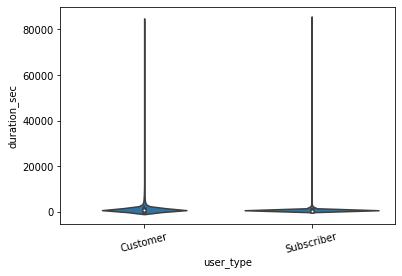

In [41]:
# 2. duration v.s user_type
sb.violinplot(data=bike_copy, x='user_type', y='duration_sec', color=base_color, innner=None)
plt.xticks(rotation=15);

> This violin plot does not tell much due to duraction_sec outliers.

In [42]:
bike_copy['duration_log'] = np.log(bike_copy['duration_sec'])
bike_nona['duration_log'] = np.log(bike_nona['duration_sec'])

C:\Users\bi534\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


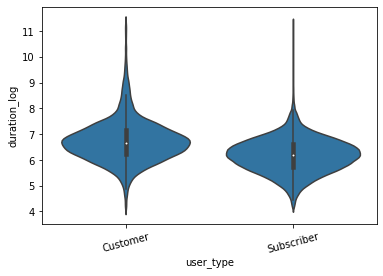

In [43]:
sb.violinplot(data=bike_copy, x='user_type', y='duration_log', color=base_color, innner=None)
plt.xticks(rotation=15);

> The voilin plot is greatly influenced by the max value of duration_sec.<br />
> Customer's time range is wider than Subscriber after log transformation.

In [44]:
customer = bike_copy.query('user_type == "Customer"')
subscriber = bike_copy.query('user_type == "Subscriber"')

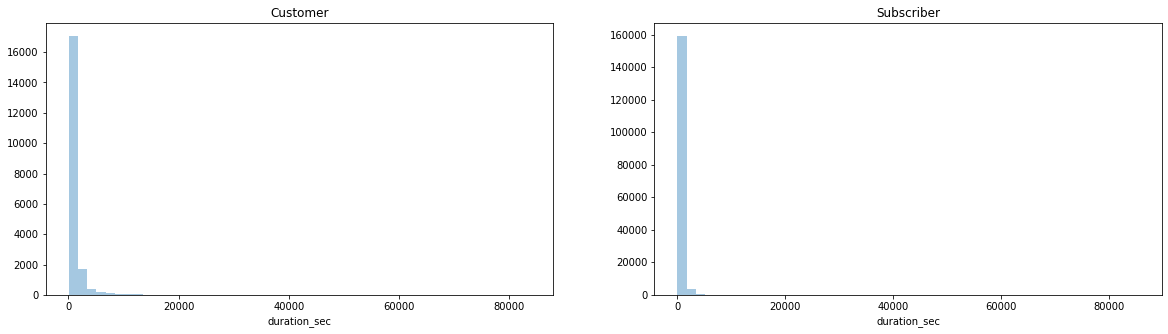

In [45]:
plt.figure(figsize = [20, 5]) 
ax1 = plt.subplot(1, 2, 1) 
sb.distplot(customer['duration_sec'], kde=False);
ax1.title.set_text('Customer')
ax2 = plt.subplot(1, 2, 2) 
sb.distplot(subscriber['duration_sec'], kde=False);
ax2.title.set_text('Subscriber')

> The two histograms do not show much due to duration_sec's outlier.

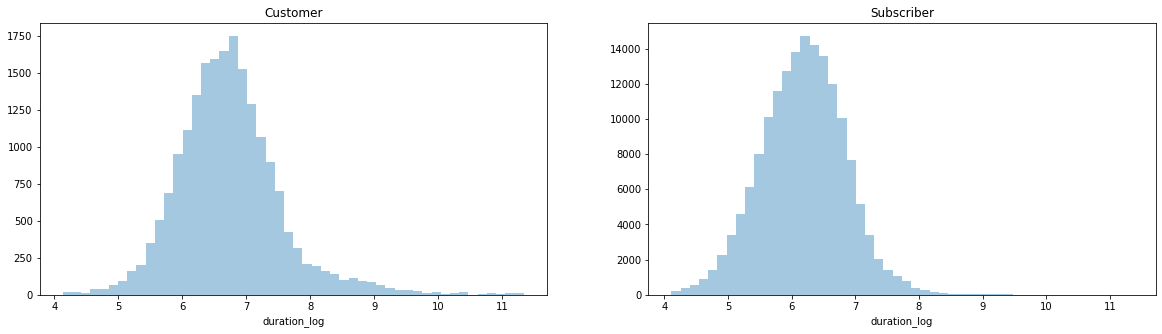

In [46]:
plt.figure(figsize = [20, 5]) 
ax1 = plt.subplot(1, 2, 1) 
sb.distplot(customer['duration_log'], kde=False);
ax1.title.set_text('Customer')
ax2 = plt.subplot(1, 2, 2) 
sb.distplot(subscriber['duration_log'], kde=False);
ax2.title.set_text('Subscriber')

> After transformation, customer and subscriber's duration distribution still show similar patterns. Customers' mean and mode are larger than Subscribers' counter part.

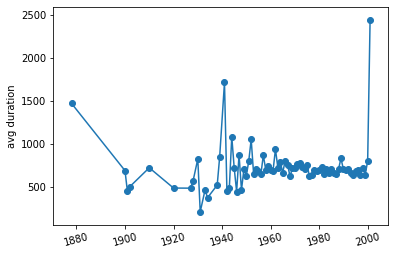

In [47]:
# 3. average duration v.s. member_birth_year
year = np.sort(bike_nona['member_birth_year'].unique())
line_color = sb.color_palette()[0]
year_dur_mean = bike_nona.groupby('member_birth_year').mean()['duration_sec']
plt.errorbar(x=year, y=year_dur_mean, c=line_color);
plt.scatter(x=year, y=year_dur_mean);
plt.xticks(rotation=15);
plt.ylabel('avg duration');

>  For average duration, bikers born after 1960 and before 2000 have very similar time usage habbit.

In [48]:
# 4. duration v.s. member_gender
male = bike_nona.query('member_gender == "Male"')
female = bike_nona.query('member_gender  == "Female"')

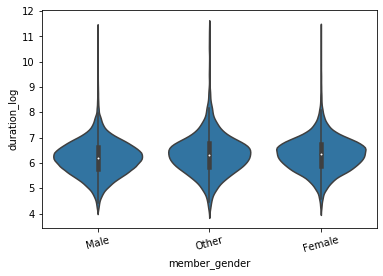

In [49]:
sb.violinplot(data=bike_nona, x='member_gender', y='duration_log', color=base_color, innner=None)
plt.xticks(rotation=15);

> Male, Female and Other gender show very similar duration_sec distribution.

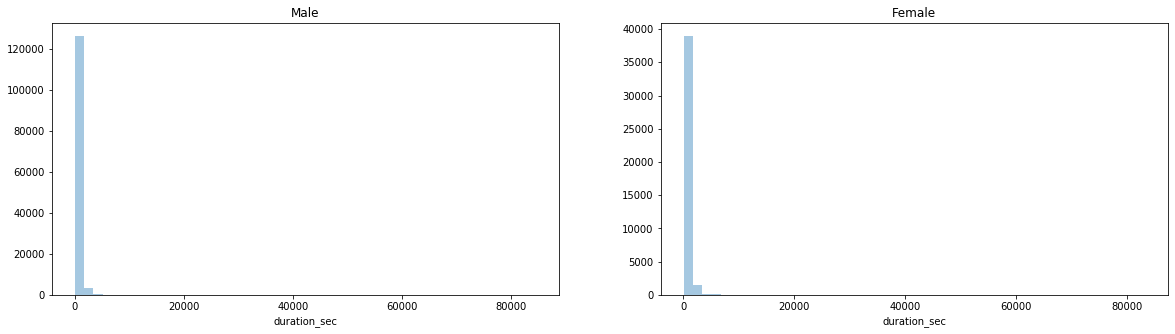

In [50]:
plt.figure(figsize = [20, 5]) 
ax1 = plt.subplot(1, 2, 1) 
sb.distplot(male['duration_sec'], kde=False);
ax1.title.set_text('Male')
ax2 = plt.subplot(1, 2, 2) 
sb.distplot(female['duration_sec'], kde=False);
ax2.title.set_text('Female')

> The separated Male and Female's duration_sec histogram do not show much due to outliers.

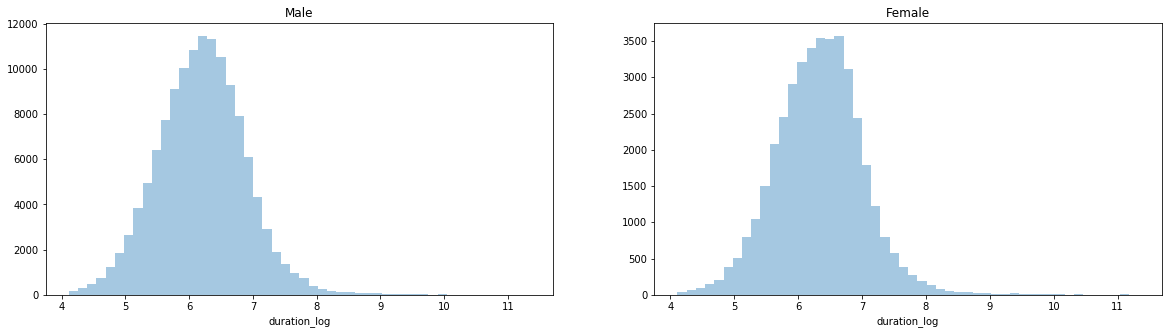

In [51]:
plt.figure(figsize = [20, 5]) 
ax1 = plt.subplot(1, 2, 1) 
sb.distplot(male['duration_log'], kde=False);
ax1.title.set_text('Male')
ax2 = plt.subplot(1, 2, 2) 
sb.distplot(female['duration_log'], kde=False);
ax2.title.set_text('Female')

> Female bikers' log duration have higher mean than Male bikers.

In [52]:
# 5. duration v.s. bike_share_for_all_trip
share = bike_copy.query('bike_share_for_all_trip == "Yes"')
not_share = bike_copy.query('bike_share_for_all_trip  == "No"')

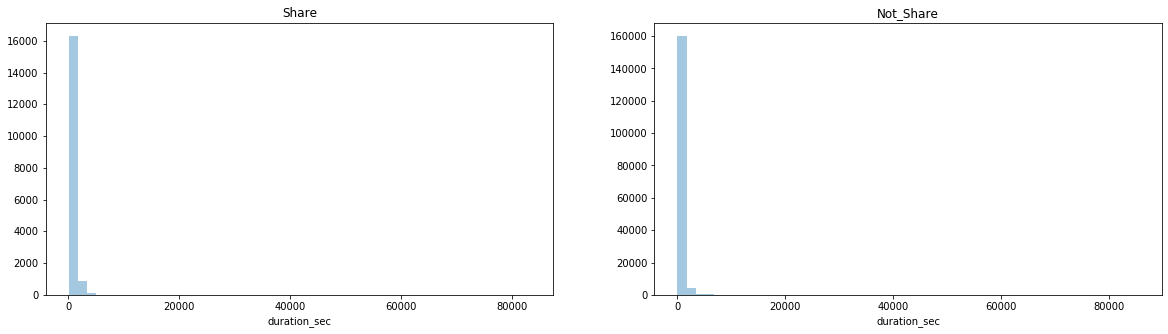

In [53]:
plt.figure(figsize = [20, 5]) 
ax1 = plt.subplot(1, 2, 1) 
sb.distplot(share['duration_sec'], kde=False);
ax1.title.set_text('Share')
ax2 = plt.subplot(1, 2, 2) 
sb.distplot(not_share['duration_sec'], kde=False);
ax2.title.set_text('Not_Share')

> The separated Share and Unshare duration_sec histogram do not show much due to outliers.

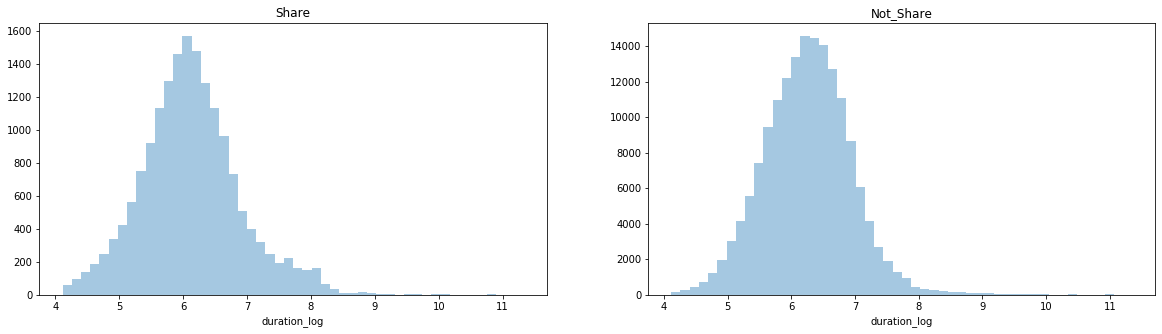

In [54]:
plt.figure(figsize = [20, 5]) 
ax1 = plt.subplot(1, 2, 1) 
sb.distplot(share['duration_log'], kde=False);
ax1.title.set_text('Share')
ax2 = plt.subplot(1, 2, 2) 
sb.distplot(not_share['duration_log'], kde=False);
ax2.title.set_text('Not_Share')

> Share or unshare bikers do not show significant distribution differences.

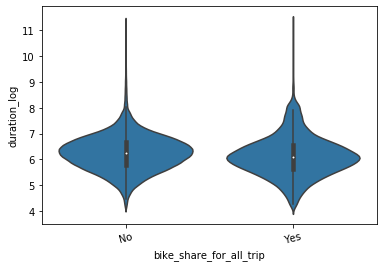

In [55]:
sb.violinplot(data=bike_copy, x='bike_share_for_all_trip', y='duration_log', color=base_color, innner=None)
plt.xticks(rotation=15);

> Share or unshare bikers do not show significant distribution differences.

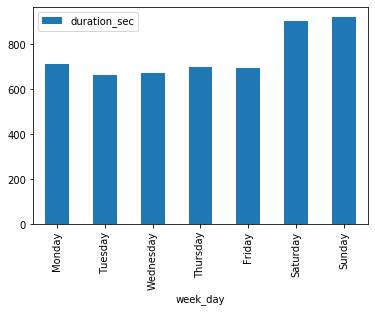

In [56]:
# 6. average duration v.s week_day
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_duration = bike_copy.groupby('week_day')['duration_sec'].mean().reset_index()
week_duration.set_index('week_day').loc[order].plot(kind='bar');

> Average duration_sec is higher on weekends.

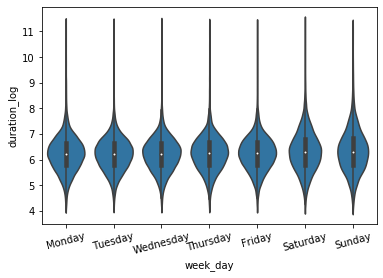

In [57]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.violinplot(data=bike_copy, x='week_day', y='duration_log', color=base_color, innner=None, order=order)
plt.xticks(rotation=15);

> From average duration v.s. week_day bar chart and duration_log v.s. week_day violin chart, the duration range in weeekends is a wider and higher than week_day.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. Duration v.s. distance show negative correlation.
> 2. Bikers born after 1960 and before 2000 have very similar time usage habbit.
> 3. Bikers's time usage distribution during weekends is wider than week_day.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

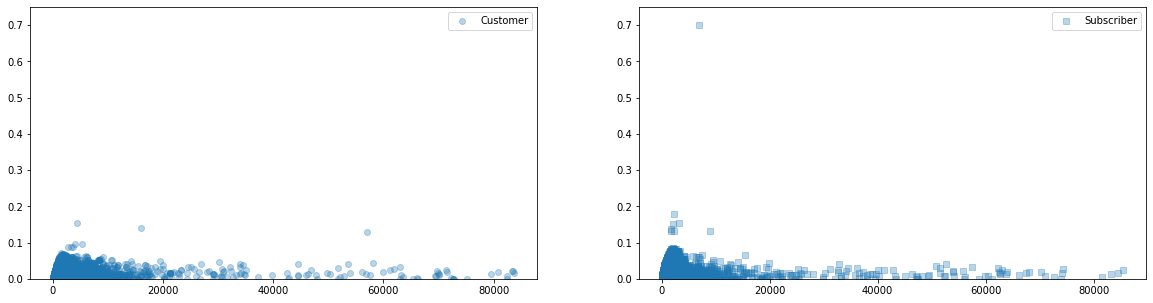

In [58]:
# 1. duration v.s. distance v.s user_type
cat_markers = [['Customer', 'o'], ['Subscriber', 's']]

plt.figure(figsize = [20, 5])
i=1
for cat, marker in cat_markers:
    ax = plt.subplot(1, 2, i) 
    df_cat = bike_copy[bike_copy['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'duration_sec', y = 'distance', marker = marker, alpha=0.3);
    i += 1
    ax.set_ylim(0, 0.75)
    plt.legend([cat])

> There is not many difference between Customer and Subscriber's duration v.s. distance.

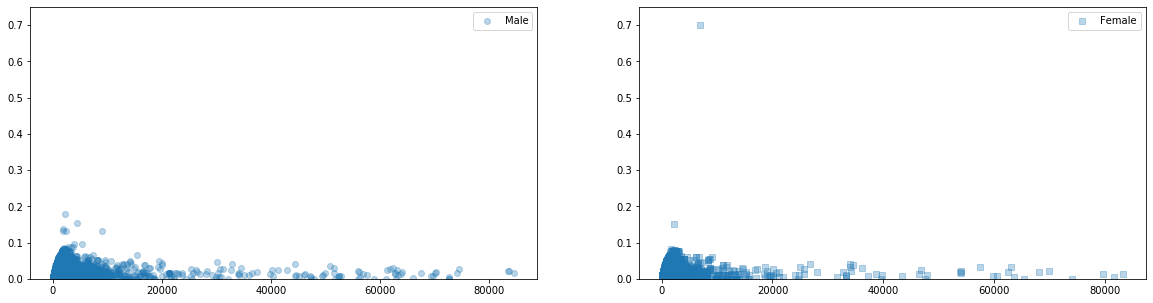

In [59]:
# 2. duration v.s. distance v.s member_gender
cat_markers = [['Male', 'o'], ['Female', 's']]

plt.figure(figsize = [20, 5])
i=1
for cat, marker in cat_markers:
    ax = plt.subplot(1, 2, i)
    df_cat = bike_copy[bike_copy['member_gender'] == cat]
    plt.scatter(data = df_cat, x = 'duration_sec', y = 'distance', marker = marker, alpha=0.3);
    plt.legend([cat])
    ax.set_ylim(0, 0.75)
    i += 1

> There is not many difference between Male and Female's duration v.s. distance.

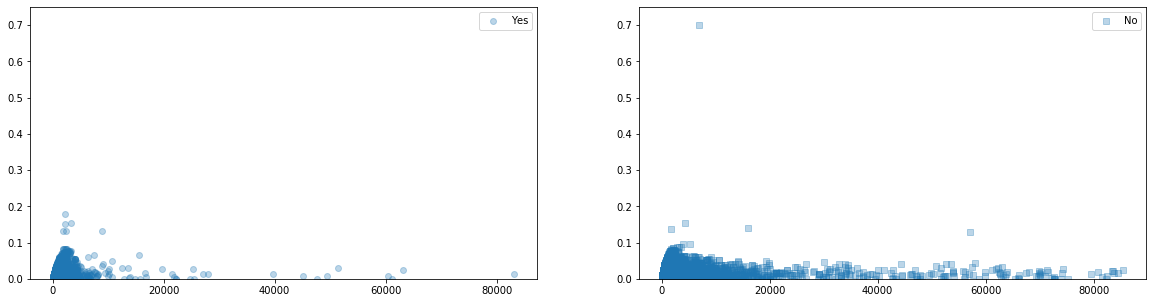

In [60]:
# 3. duration v.s. distance v.s bike_share_for_all_trip
cat_markers = [['Yes', 'o'], ['No', 's']]

plt.figure(figsize = [20, 5])
i=1
for cat, marker in cat_markers:
    ax = plt.subplot(1, 2, i)
    df_cat = bike_copy[bike_copy['bike_share_for_all_trip'] == cat]
    plt.scatter(data = df_cat, x = 'duration_sec', y = 'distance', marker = marker, alpha=0.3);
    plt.legend([cat])
    i += 1
    ax.set_ylim(0, 0.75)

> For bike trips that were shared, durations are mostly shorter than unshared trips.

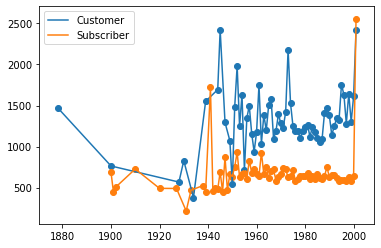

In [61]:
# 4. user_type v.s member_birth_year v.s average duration
fig, ax = plt.subplots()
type_list = bike_nona['user_type'].unique()
for i, utype in np.ndenumerate(type_list):
    line_color = sb.color_palette()[i[0]]
    bike_type = bike_nona[ bike_nona['user_type']==utype ]
    year = np.sort(bike_type['member_birth_year'].unique())
    year_dur_mean = bike_type.groupby('member_birth_year').mean()['duration_sec']
    ax.errorbar(x=year, y=year_dur_mean, c=line_color, label=utype);
    ax.scatter(x=year, y=year_dur_mean);
ax.legend();

> From this scatter plot, Subsciber's bike duration is significantly lower than Customer's bike duration.

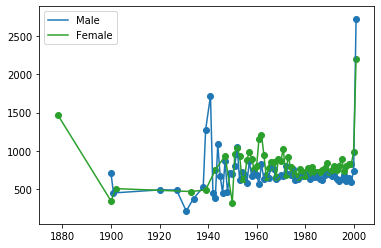

In [62]:
# 5. member_gender v.s member_birth_year v.s average duration
fig, ax = plt.subplots()
type_list = bike_nona['member_gender'].unique()
for i, utype in np.ndenumerate(type_list):
    if utype == 'Other':
        continue
    line_color = sb.color_palette()[i[0]]
    bike_type = bike_nona[ bike_nona['member_gender']==utype ]
    year = np.sort(bike_type['member_birth_year'].unique())
    year_dur_mean = bike_type.groupby('member_birth_year').mean()['duration_sec']
    ax.errorbar(x=year, y=year_dur_mean, c=line_color, label=utype);
    ax.scatter(x=year, y=year_dur_mean, c=np.array([line_color]));
ax.legend();

> For member_gender, average durations from female bikers born from 1950's to late 1990's are somewhat higher than the correspoding male bikers.

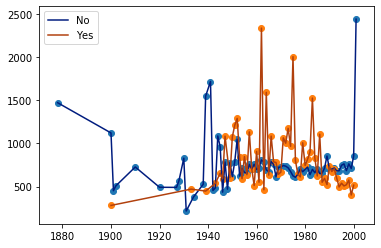

In [63]:
# 6. bike_share_for_all_trip v.s average duration v.s. member_birth_year
fig, ax = plt.subplots()
type_list = bike_nona['bike_share_for_all_trip'].unique()
for i, utype in np.ndenumerate(type_list):
    line_color = sb.color_palette('dark')[i[0]]
    bike_type = bike_nona[ bike_nona['bike_share_for_all_trip']==utype ]
    year = np.sort(bike_type['member_birth_year'].unique())
    year_dur_mean = bike_type.groupby('member_birth_year').mean()['duration_sec']
    ax.errorbar(x=year, y=year_dur_mean, c=line_color, label=utype);
    ax.scatter(x=year, y=year_dur_mean);
ax.legend();

> For trips that were shared, their duration have higher fluctuations than trips that were unshared between bikers born from 1940's to 1990's.

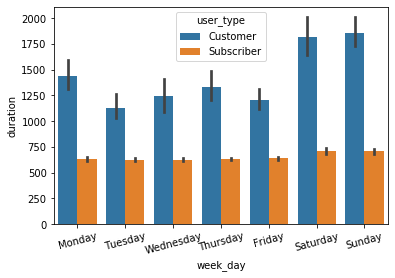

In [64]:
# 7. user_type v.s. week_day v.s duration
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.barplot(data=bike_copy, x='week_day', y='duration', hue='user_type', order=order)
plt.xticks(rotation=15);

> For Subscribers, their average durations are quite stable, with only a little increase on weekends. <br /> For Customers, their average durations are much longer than Subsribers. Their weekend usage time also has significant growth. 

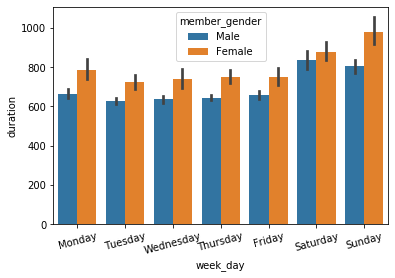

In [65]:
# 8. member_gender v.s. week_day v.s duration
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
gender = bike_copy[ bike_copy['member_gender']!='Other' ]
sb.barplot(data=gender, x='week_day', y='duration', hue='member_gender', order=order)
plt.xticks(rotation=15);

>  Female bikers have longer duration usage no matter in weekdays or weekends.

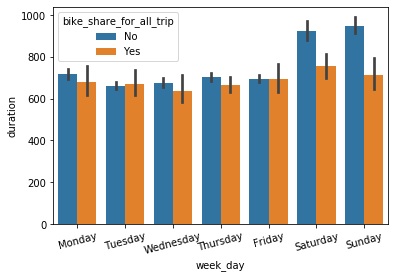

In [66]:
# 9. bike_share_for_all_trip v.s. week_day v.s duration
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.barplot(data=bike_copy, x='week_day', y='duration', hue='bike_share_for_all_trip', order=order)
plt.xticks(rotation=15);

> Biker's duration for share or unshared are similar in weekdays. Bike unshared on weekends have longer durations!

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1. The previous finding weekend duration higher than weekdays are strengthened by separating out user_type, member_gender, bike_share_for_all_trip. 
> 2. Customers, Female, bike unshared during weekends have longer durations compared to their counterparts.

### Were there any interesting or surprising interactions between features?
> 1. For bike trips that were shared, durations are mostly shorter than unshared trips.
> 2. Adding in member_birth_year, Subsciber's bike duration is significantly lower than Customer's bike duration.
> 3. Adding in member_birth_year,  average durations from female bikers born from 1950's to late 1990's are somewhat higher than the counterpart male bikers.
> 4. Adding in member_birth_year, for trips that were shared, their duration have higher fluctuations than trips that were unshared between bikers born from 1940's to late 1990's.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!